# Задача о Маятнике

Наша цель обучить несколько моделей для этой [задачи](https://gymnasium.farama.org/environments/classic_control/pendulum/):

## Подготовка данных

In [ ]:
import gymnasium as gym

In [ ]:
env = gym.make("Pendulum-v1", render_mode="rgb_array", g=9.81)

In [ ]:
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<PendulumEnv<Pendulum-v1>>>>>

In [ ]:
env.reset(seed=123, options={"low": -0.7, "high": 0.5})

(array([ 0.4123625 ,  0.91101986, -0.89235795], dtype=float32), {})

In [ ]:
!pip install stable_baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

## Генеративная модель (предсказываю положение через н секунд)

### Обучение

📟 Устройство: cpu
📦 Сбор данных...
✅ Получено 40000 состояний
🧠 Обучение автоэнкодера...
Эпоха 0/100, Loss: 0.0298
Эпоха 10/100, Loss: 0.0000
Эпоха 20/100, Loss: 0.0000
Эпоха 30/100, Loss: 0.0000
Эпоха 40/100, Loss: 0.0000
Эпоха 50/100, Loss: 0.0000
Эпоха 60/100, Loss: 0.0000
Эпоха 70/100, Loss: 0.0000
Эпоха 80/100, Loss: 0.0000
Эпоха 90/100, Loss: 0.0000


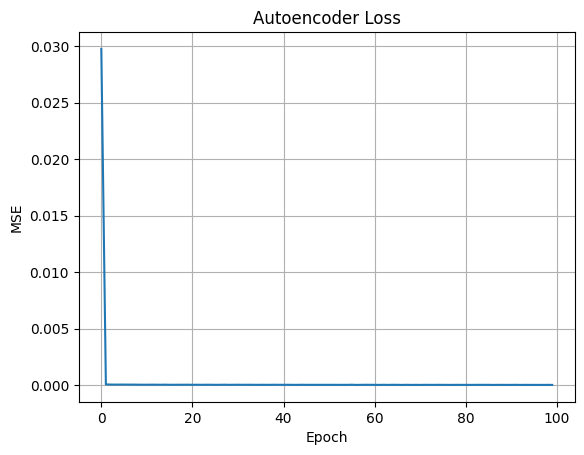

📦 Сбор данных для вторичной сети...
✅ Собрано 19500 пар [latent → future_state]
🧠 Обучение вторичной сети...


<ipython-input-1-7e364789d74a>:167: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X_tensor = torch.tensor(X_latent, dtype=torch.float32).to(DEVICE)


Эпоха 0/200, Loss: 0.0307
Эпоха 10/200, Loss: 0.0037
Эпоха 20/200, Loss: 0.0036
Эпоха 30/200, Loss: 0.0036
Эпоха 40/200, Loss: 0.0035
Эпоха 50/200, Loss: 0.0036
Эпоха 60/200, Loss: 0.0035
Эпоха 70/200, Loss: 0.0035
Эпоха 80/200, Loss: 0.0035
Эпоха 90/200, Loss: 0.0035
Эпоха 100/200, Loss: 0.0035
Эпоха 110/200, Loss: 0.0035
Эпоха 120/200, Loss: 0.0035
Эпоха 130/200, Loss: 0.0035
Эпоха 140/200, Loss: 0.0034
Эпоха 150/200, Loss: 0.0034
Эпоха 160/200, Loss: 0.0034
Эпоха 170/200, Loss: 0.0034
Эпоха 180/200, Loss: 0.0034
Эпоха 190/200, Loss: 0.0034


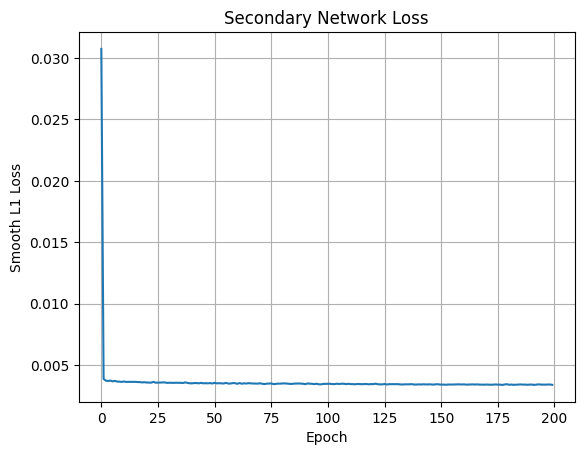


📉 MSE на обучающих данных: 0.0474
  ▶️ MSE cos(θ): 0.0021
  ▶️ MSE sin(θ): 0.0021
  ▶️ MSE θ̇: 0.1379

🎯 Пример предсказания:
Предсказано (через 5 шагов): [ 0.09326266 -0.96540993 -5.7668524 ]
Истинное значение: [ 0.1377606 -0.9904656 -5.7439895]
Средняя ошибка: 0.0010


In [ ]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# ⚙️ Настройки
ENV_NAME = "Pendulum-v1"
N_FUTURE_STEPS = 5
LATENT_SIZE = 16
EPOCHS_AUTOENCODER = 100
EPOCHS_SECONDARY = 200
BATCH_SIZE = 32
LR = 1e-3
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"📟 Устройство: {DEVICE}")

# 🎯 Создаем среду
env = gym.make(ENV_NAME)
state_size = env.observation_space.shape[0]

# 🧱 Autoencoder
class Encoder(nn.Module):
    def __init__(self, input_size, latent_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, latent_size)
        )

    def forward(self, x):
        return self.model(x)

class Decoder(nn.Module):
    def __init__(self, latent_size, output_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_size, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, z):
        return self.model(z)

# 🧠 Вторичная сеть
class SecondaryNet(nn.Module):
    def __init__(self, latent_size, output_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_size, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.model(x)

# 📦 Сбор данных: состояния маятника
print("📦 Сбор данных...")
all_states = []
num_episodes = 200
for _ in range(num_episodes):
    state, _ = env.reset()
    done = False
    ep_states = []
    while not done:
        all_states.append(state)
        ep_states.append(state)
        action = env.action_space.sample()
        state, _, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
env.close()

all_states = np.array(all_states)
print(f"✅ Получено {len(all_states)} состояний")

# ⚖️ Нормализация состояний
scaler = StandardScaler()
states_scaled = scaler.fit_transform(all_states)

# 🔧 Обучение автоэнкодера
encoder = Encoder(state_size, LATENT_SIZE).to(DEVICE)
decoder = Decoder(LATENT_SIZE, state_size).to(DEVICE)
ae_optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=LR)
ae_criterion = nn.MSELoss()

states_tensor = torch.tensor(states_scaled, dtype=torch.float32).to(DEVICE)

print("🧠 Обучение автоэнкодера...")
ae_losses = []
for epoch in range(EPOCHS_AUTOENCODER):
    perm = torch.randperm(len(states_tensor))
    epoch_loss = 0
    for i in range(0, len(states_tensor), BATCH_SIZE):
        idx = perm[i:i+BATCH_SIZE]
        batch = states_tensor[idx]
        z = encoder(batch)
        recon = decoder(z)
        loss = ae_criterion(recon, batch)

        ae_optimizer.zero_grad()
        loss.backward()
        ae_optimizer.step()

        epoch_loss += loss.item()
    avg_loss = epoch_loss / (len(states_tensor) // BATCH_SIZE)
    ae_losses.append(avg_loss)
    if epoch % 10 == 0:
        print(f"Эпоха {epoch}/{EPOCHS_AUTOENCODER}, Loss: {avg_loss:.4f}")

# 📈 Визуализация потерь автоэнкодера
plt.plot(ae_losses)
plt.title("Autoencoder Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

# 📦 Сбор пар: [latent_t] → state_{t+N}
print("📦 Сбор данных для вторичной сети...")
X_latent = []
y_future = []

env = gym.make(ENV_NAME)
for _ in range(100):
    state, _ = env.reset()
    done = False
    ep_states = []

    while not done:
        ep_states.append(state)
        action = env.action_space.sample()
        state, _, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

    # Обработка эпизода
    if len(ep_states) > N_FUTURE_STEPS:
        for i in range(len(ep_states) - N_FUTURE_STEPS):
            current = scaler.transform([ep_states[i]])
            future = ep_states[i + N_FUTURE_STEPS]

            with torch.no_grad():
                latent = encoder(torch.tensor(current, dtype=torch.float32).to(DEVICE)).cpu().numpy()[0]

            X_latent.append(latent)
            y_future.append(future)

env.close()
print(f"✅ Собрано {len(X_latent)} пар [latent → future_state]")

# ⚖️ Нормализация целевых значений
scaler_y = StandardScaler()
y_future_scaled = scaler_y.fit_transform(y_future)

# 🎯 Обучение вторичной сети
secondary_net = SecondaryNet(LATENT_SIZE, state_size).to(DEVICE)
secondary_optimizer = optim.Adam(secondary_net.parameters(), lr=LR)
secondary_criterion = nn.SmoothL1Loss()

X_tensor = torch.tensor(X_latent, dtype=torch.float32).to(DEVICE)
y_tensor = torch.tensor(y_future_scaled, dtype=torch.float32).to(DEVICE)

print("🧠 Обучение вторичной сети...")
secondary_losses = []
for epoch in range(EPOCHS_SECONDARY):
    perm = torch.randperm(len(X_tensor))
    epoch_loss = 0
    for i in range(0, len(X_tensor), BATCH_SIZE):
        idx = perm[i:i+BATCH_SIZE]
        batch_X = X_tensor[idx]
        batch_y = y_tensor[idx]

        pred = secondary_net(batch_X)
        loss = secondary_criterion(pred, batch_y)

        secondary_optimizer.zero_grad()
        loss.backward()
        secondary_optimizer.step()
        epoch_loss += loss.item()

    avg_loss = epoch_loss / (len(X_tensor) // BATCH_SIZE)
    secondary_losses.append(avg_loss)
    if epoch % 10 == 0:
        print(f"Эпоха {epoch}/{EPOCHS_SECONDARY}, Loss: {avg_loss:.4f}")

# 📈 Потери вторичной сети
plt.plot(secondary_losses)
plt.title("Secondary Network Loss")
plt.xlabel("Epoch")
plt.ylabel("Smooth L1 Loss")
plt.grid(True)
plt.show()

# 📊 Оценка
with torch.no_grad():
    preds_scaled = secondary_net(X_tensor).cpu().numpy()
    preds = scaler_y.inverse_transform(preds_scaled)
    y_true = scaler_y.inverse_transform(y_tensor.cpu().numpy())

    mse_total = mean_squared_error(y_true, preds)
    print(f"\n📉 MSE на обучающих данных: {mse_total:.4f}")

    # По компонентам
    components = ['cos(θ)', 'sin(θ)', 'θ̇']
    for i, comp in enumerate(components):
        comp_mse = mean_squared_error(y_true[:, i], preds[:, i])
        print(f"  ▶️ MSE {comp}: {comp_mse:.4f}")

# 🔍 Пример предсказания
idx = np.random.randint(0, len(X_tensor))
with torch.no_grad():
    pred = secondary_net(X_tensor[idx].unsqueeze(0)).cpu().numpy()
    pred_real = scaler_y.inverse_transform(pred)[0]
    true_real = y_future[idx]
    error = np.mean((pred_real - true_real)**2)

print("\n🎯 Пример предсказания:")
print(f"Предсказано (через {N_FUTURE_STEPS} шагов): {pred_real}")
print(f"Истинное значение: {true_real}")
print(f"Средняя ошибка: {error:.4f}")

### Метрики